<a href="https://colab.research.google.com/github/bayu-nanda/time-series/blob/main/Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDIKSI HARGA BITCOIN**

In [14]:
# jalankan requirement dibawah ini
# pip install yfinance
# pip install --upgrade yfinance pandas_datareader

In [24]:
# masukkan library berikut
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as web
import pandas_datareader
import yfinance as yfin
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [25]:
# cek tensor flow version
import tensorflow as tf
print(tf.__version__)

2.18.0


In [26]:
# Masukkan simbol saham
ticker_symbol = "BTC-USD"

# Buat objek ticker
ticker = yfin.Ticker(ticker_symbol)

# Tentukan tanggal mulai dan akhir (format: YYYY-MM-DD)
start_date = "2015-01-01"
end_date = "2024-01-31"

# Ambil data historis berdasarkan rentang tanggal
data = ticker.history(start=start_date, end=end_date)

# Tampilkan data
print(data)

# Simpan ke file CSV
data.to_csv(f"{ticker_symbol}_{start_date}_to_{end_date}.csv")

print(f"Data berhasil disimpan ke {ticker_symbol}_{start_date}_to_{end_date}.csv")


                                   Open          High           Low  \
Date                                                                  
2015-01-01 00:00:00+00:00    320.434998    320.434998    314.002991   
2015-01-02 00:00:00+00:00    314.079010    315.838989    313.565002   
2015-01-03 00:00:00+00:00    314.846008    315.149994    281.082001   
2015-01-04 00:00:00+00:00    281.145996    287.230011    257.612000   
2015-01-05 00:00:00+00:00    265.084015    278.341003    265.084015   
...                                 ...           ...           ...   
2024-01-26 00:00:00+00:00  39936.816406  42209.386719  39825.691406   
2024-01-27 00:00:00+00:00  41815.625000  42195.632812  41431.281250   
2024-01-28 00:00:00+00:00  42126.125000  42797.175781  41696.910156   
2024-01-29 00:00:00+00:00  42030.914062  43305.867188  41818.332031   
2024-01-30 00:00:00+00:00  43300.226562  43838.945312  42711.371094   

                                  Close       Volume  Dividends  Stock Split

In [27]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days=60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [28]:
print(len(x_train))
print(len(y_train))

3257
3257


In [29]:

#build model

model = Sequential()

model.add(LSTM(units=50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))





/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50,batch_size=32)

Epoch 1/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - loss: 0.0205
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - loss: 0.0028
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 0.0022
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 0.0019
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - loss: 0.0020
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 0.0016
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - loss: 0.0016
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 0.0015
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0015
Epoch 10/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - loss: 0.0011
Epoch 11/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 0.0013
Epoch 12/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - loss: 0.0013
Epoch 13/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - loss: 0.0013
Epoch 14/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0010
Epoch 15/50
102/102 ━━━━━━━━━━

In [42]:
#test model

#load test data
test_start = '2024-02-01'
test_end = dt.datetime.now()

test_data = ticker.history(start=test_start, end=test_end)

actual_price= test_data['Close'].values

total_dataset = pd.concat((data['Close'],test_data['Close']),axis=0)

model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)





In [43]:
print(len(model_inputs))
print(len(test_data))
print(len(total_dataset))

554
494
3811


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


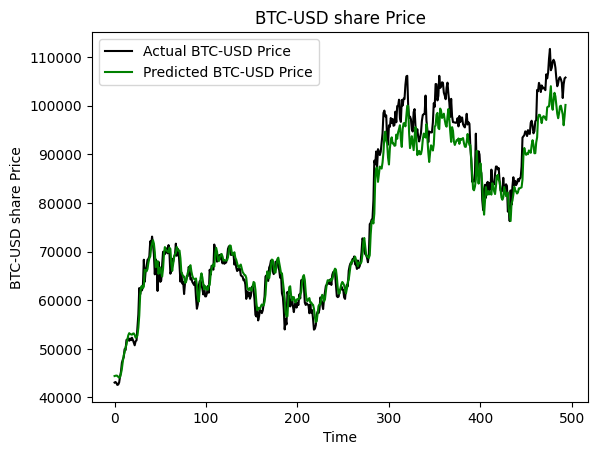

In [44]:
#make prediction
x_test=[]

for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

#plot the test predict

plt.plot(actual_price, color="black",label=f"Actual {ticker_symbol} Price")
plt.plot(predicted_prices,color='green',label=f"Predicted {ticker_symbol} Price")
plt.title(f"{ticker_symbol} share Price")
plt.xlabel('Time')
plt.ylabel(f'{ticker_symbol} share Price')
plt.legend()
plt.show()

In [46]:
#predict next day

real_data = [model_inputs[len(model_inputs)-prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0], real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction:{prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction:[[100170.92]]
